# Options pricing using Geometric Brownian Motion and Monte-Carlo simulation

## Importing used libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
%matplotlib inline

## Paramaters for simulating GBM

In [22]:
#Number of steps of our simulation :
n=100
#Number of simulations :
M=1000
#Time
T=1
#Volatily 
s=0.35
#Drift coefficient:
µ=0.1
#Initial price 
S0=100

## Simulation and plot

In [23]:
#Calculating each time step 
t=T/n
#Simulating our GBM using numpy
S_t=np.exp((µ-s**2/2)*t+s*np.random.normal(0,np.sqrt(t), size=(M,n)).T) #Transposing our array
S_t = np.vstack([np.ones(M),S_t]) #Stacking our Vector S_t with array of 1 so that we have a new axis full of 1.
#Had we did it with np.zeros we would have get only 0 for every coefficient.
S_t=S0 * S_t.cumprod(axis=0) #cumulative product of our matrix on each row,
#meaning that we are multiplying each coefficient at every step t by S0
#printing one branch to see the actual result
S_t[1]

array([100.42933469, 101.18350397, 100.71336853,  96.68375138,
       101.79767394,  99.94925615,  95.98644465, 100.45160324,
       100.01673593, 103.53815107,  94.51170494,  93.50286227,
       102.62619165, 105.69104184, 101.49658002,  95.68094236,
       100.62717927,  97.84018355,  99.56667787, 100.35038213,
       100.13648956, 104.00454034, 100.60665367,  97.35101511,
        94.85474912,  94.3088351 , 103.69197423, 103.02175218,
       103.91744957,  97.17701514,  99.39299123, 100.57428078,
        99.50871414,  99.90849213, 104.50156796, 103.8665101 ,
        98.61652363, 100.64507467, 101.75684581, 104.02562524,
       103.72391477, 100.84422786,  96.23832168,  99.00488443,
        99.8581895 , 102.48056654, 100.47807244, 103.21204619,
        96.54583041,  96.79175802,  94.8976644 , 101.14876316,
       104.21033068,  96.2444271 ,  96.51446286,  97.2895018 ,
        96.7233787 ,  99.00418165,  93.42222108, 102.40201052,
       101.01646588, 105.83875723,  99.66519112,  92.44

<function matplotlib.pyplot.show(close=None, block=None)>

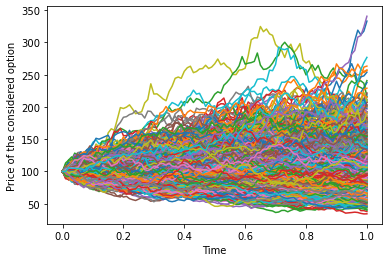

In [24]:
#We now want to convert our steps as a time interval
Time = np.linspace(0,T,n+1) #Getting an array from 0 to 1 (not putting n+1 result in not "round" numbers)
#To plot our results, we have to create a new array with the same format as S_t
S_tcopy=np.full(shape=(M,n+1),fill_value=Time).T

plt.plot(S_tcopy,S_t)
plt.xlabel('Time')
plt.ylabel('Price of the considered option')
plt.show

# Applying this to Google's stock :

## Importing data using yfinance

In [16]:
goog = yf.Ticker('GOOG')
history=goog.history(start='2023-01-01',end='2024-02-01')

## Taking a look at our imported stock prices

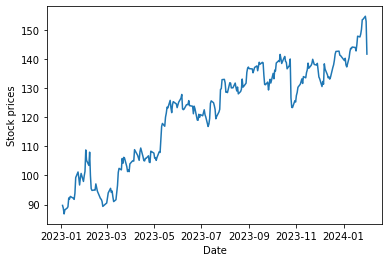

In [17]:
plt.plot(history['Close'])
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.show()

## Monte Carlo Simulation 

Number of days : 271


<function matplotlib.pyplot.show(close=None, block=None)>

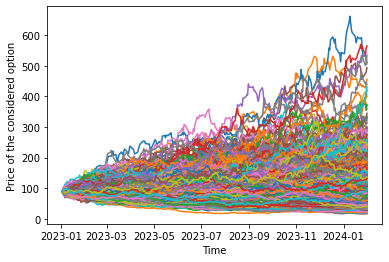

In [25]:
#number of steps
n=len(history)
print('Number of days :', n)
#initializing our array, we before used numpy but since yfinance uses panda, we'll do the same.
S_t = pd.DataFrame(0,index=history.index,columns=list(range(1,M+1))) #Using the same M as before (M=1000) we create a matrix 
#this matrix will contain our stock prices
S_t.iloc[0] = history['Close'].iloc[0] #S_0
for i in range(1,n):
    dS=µ*t+s*np.sqrt(t)*np.random.randn(M) 
    S_t.iloc[i]=S_t.iloc[i-1]+S_t.iloc[i-1]*dS
#after vizualisation we obtain similar graphics, well done !
plt.plot(S_t)
plt.xlabel('Time')
plt.ylabel('Price of the considered option')
plt.show

## Comparison with reality 

Expected value using Monte Carlo Method :  116.21061780198612
Expected value using Theory :  0    109.478998
Name: 2024-01-31 00:00:00-05:00, dtype: float64


Text(0, 0.5, 'Expected Value')

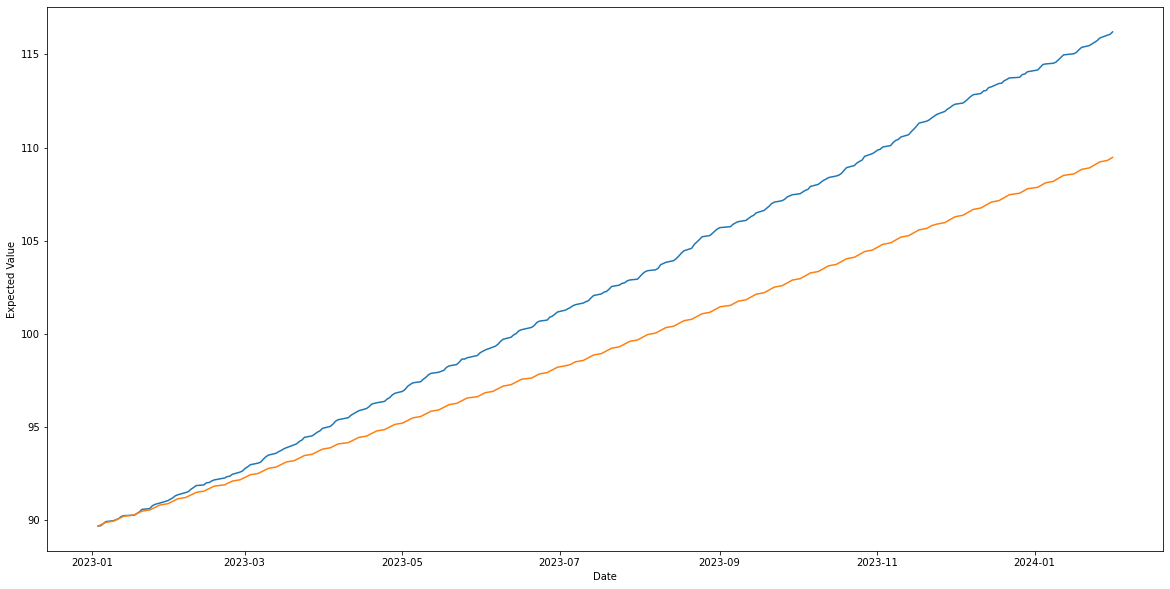

In [19]:
#Mean and volatility
St_mean = S_t.mean(axis=1)
St_thmean = history['Close'].iloc[0] * np.exp(µ*np.arange(n)/n*2) 
#I will turn St_thmean wich is the theoritecal value into a pandaframe so that it's easier to compare 
St_thmean = pd.DataFrame(St_thmean, index=St_mean.index)

print('Expected value using Monte Carlo Method : ', St_mean.iloc[-1])
print('Expected value using Theory : ', St_thmean.iloc[-1])

figure = plt.figure(figsize=(20,10))
axe = figure.add_subplot(111)
plt.plot(St_mean)
plt.plot(St_thmean)
plt.xlabel(('Date'))
plt.ylabel('Expected Value')